In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
from matplotlib import pylab
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import seaborn as sns

In [304]:
data = "../DataSets/Clustering/1632560262896716.csv"
df = pd.read_csv(data)

In [305]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [306]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
162,163,Male,19,81,5
126,127,Male,43,71,35
72,73,Female,60,50,49
41,42,Male,24,38,92


In [307]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [308]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [309]:
df.drop('CustomerID', axis = 1, inplace = True)

In [310]:
df.isnull().sum().max()

0

In [311]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [312]:
df.shape

(200, 4)

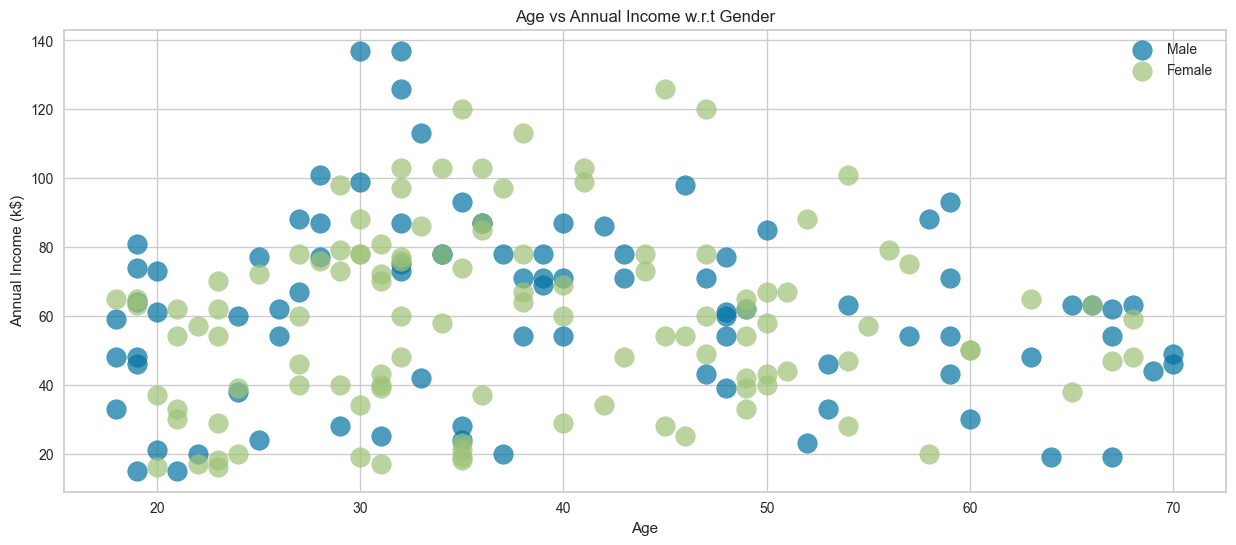

In [313]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.7 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

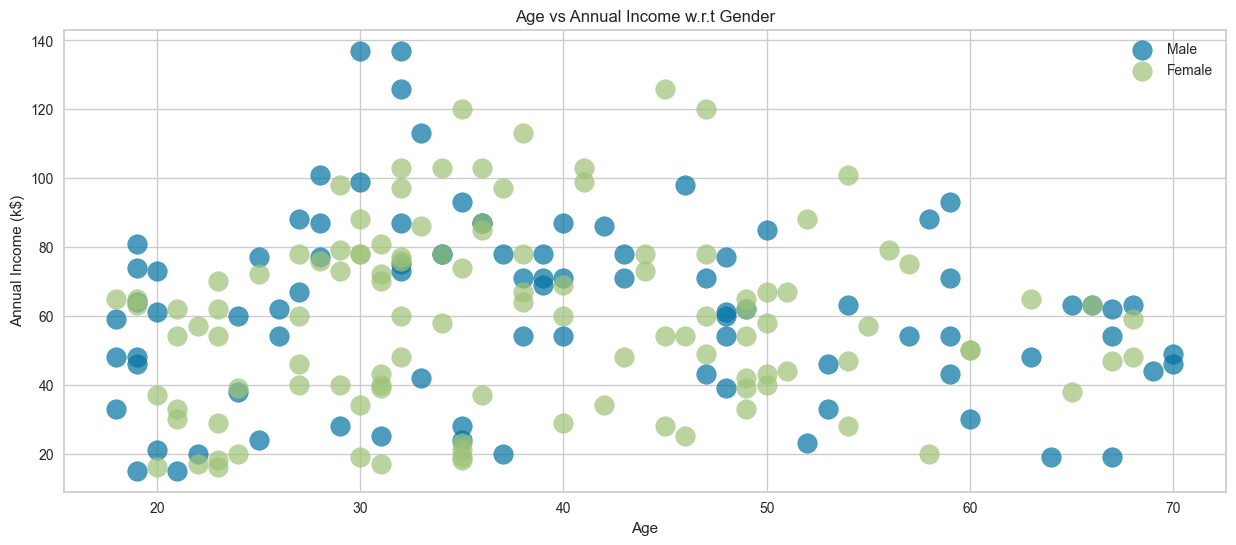

In [314]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = df[df['Gender'] == gender], s = 200,
                 alpha = 0.7, label = gender)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()
    

In [315]:
x = df.values[:, 2:]

In [316]:
xKmean = np.nan_to_num(x)

In [317]:
xKmean[:2]

array([[15, 39],
       [15, 81]], dtype=object)

In [318]:
scaler = StandardScaler()
xKmean = scaler.fit_transform(xKmean)

In [319]:
xKmean[:3]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298]])

In [320]:
#kmeans
clusterNum = 5
kmeans = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12, random_state = 0)

In [321]:
kmeans.fit(xKmean)
labels = kmeans.labels_
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [322]:
dfKmean = df.copy()
dfKmean['Cluster_Num'] = labels

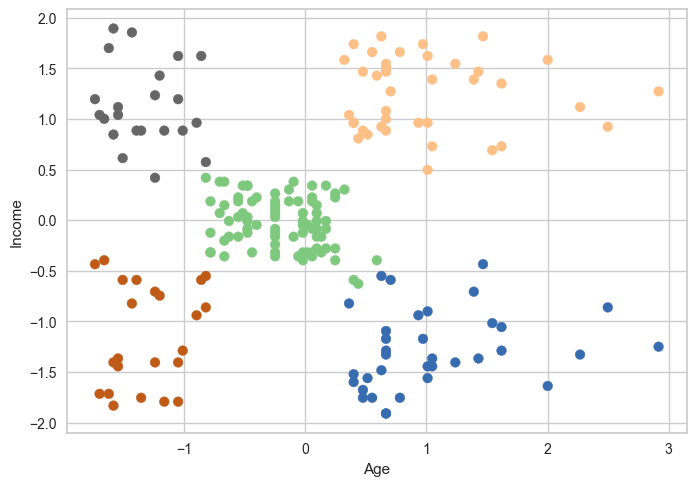

In [323]:
plt.scatter(xKmean[:, 0], xKmean[:, 1], c = labels, cmap = 'Accent', alpha = 1)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

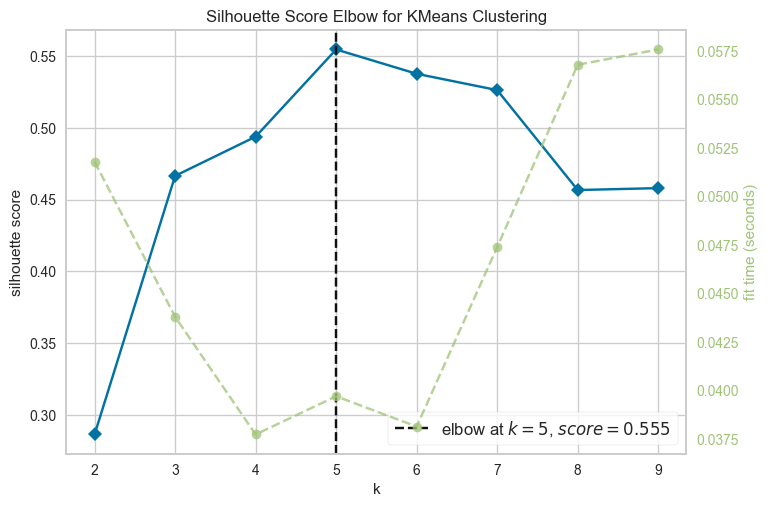

In [324]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette')
visualizer.fit(xKmean)
visualizer.show()
plt.show()

In [325]:
#Agglomerative_CarData

xAgg = np.nan_to_num(x)
xAgg[:3]

array([[15, 39],
       [15, 81],
       [16, 6]], dtype=object)

In [326]:
scalerAgg = MinMaxScaler()
xAgg = scalerAgg.fit_transform(xAgg)
xAgg[:3]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041]])

In [327]:
distMatrix = euclidean_distances(xAgg, xAgg)
print(distMatrix)

[[0.         0.42857143 0.33683444 ... 0.97742145 1.0227015  1.09616727]
 [0.42857143 0.         0.76535002 ... 0.91263558 1.18880836 1.00020822]
 [0.33683444 0.76535002 0.         ... 1.13772561 0.99933353 1.26531446]
 ...
 [0.97742145 0.91263558 1.13772561 ... 0.         0.57849818 0.12869934]
 [1.0227015  1.18880836 0.99933353 ... 0.57849818 0.         0.66326531]
 [1.09616727 1.00020822 1.26531446 ... 0.12869934 0.66326531 0.        ]]


In [328]:
z_distMatrix = hierarchy.linkage(xAgg, 'complete')

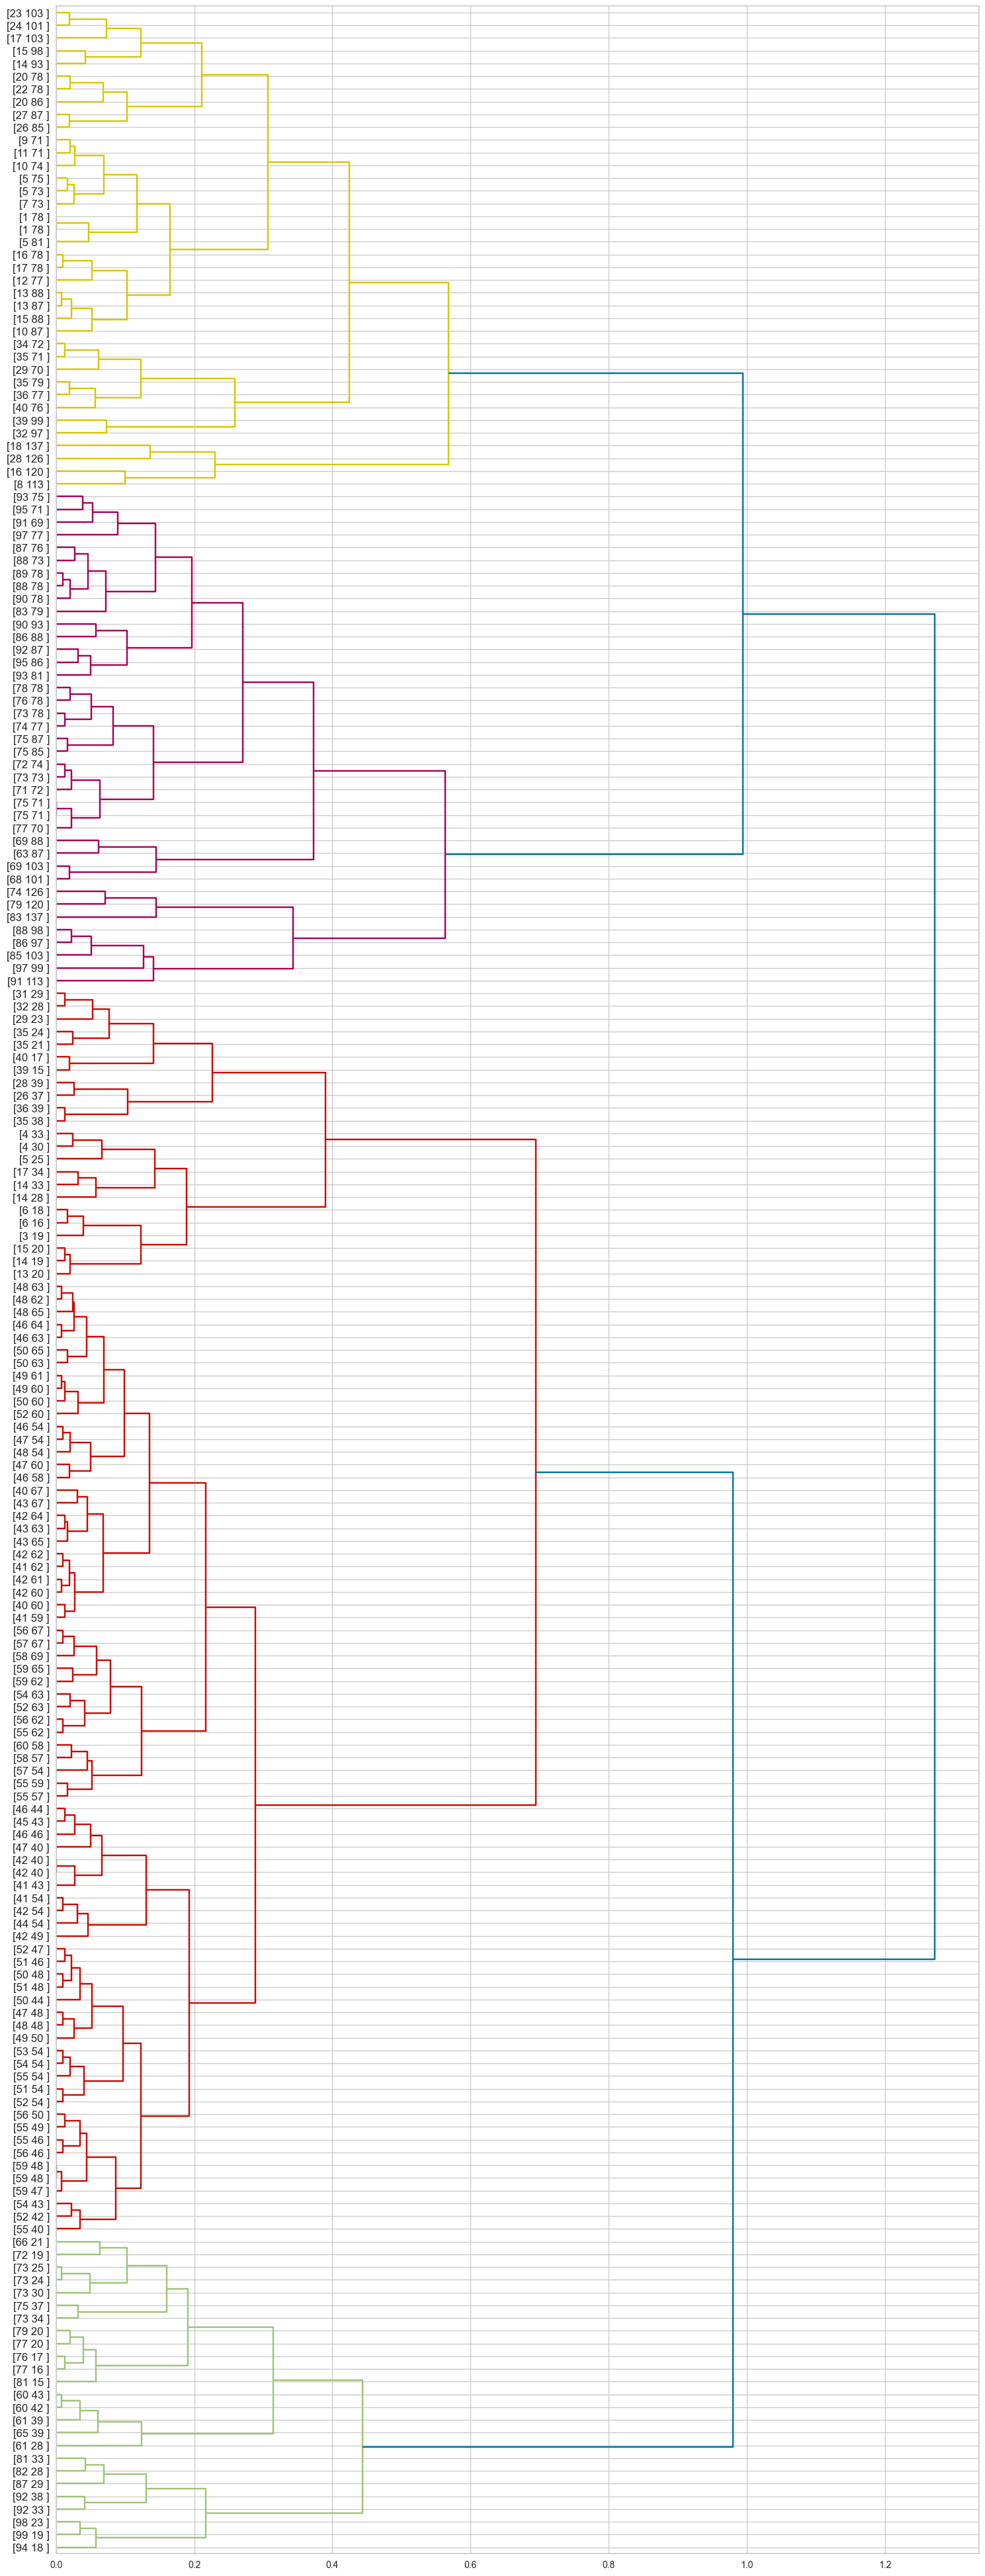

In [329]:
fig = pylab.figure(figsize = (18, 50))
def llf(id):
    return '[%s %s ]' % (df['Spending Score (1-100)'][id], df['Annual Income (k$)'][id])

dendo = hierarchy.dendrogram(z_distMatrix, leaf_label_func = llf, leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [330]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(distMatrix)
agglom.labels_

c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:566: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [331]:
dfAgg = df.copy()
dfAgg['cluster_'] = agglom.labels_

In [332]:
dfAgg.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,3


c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

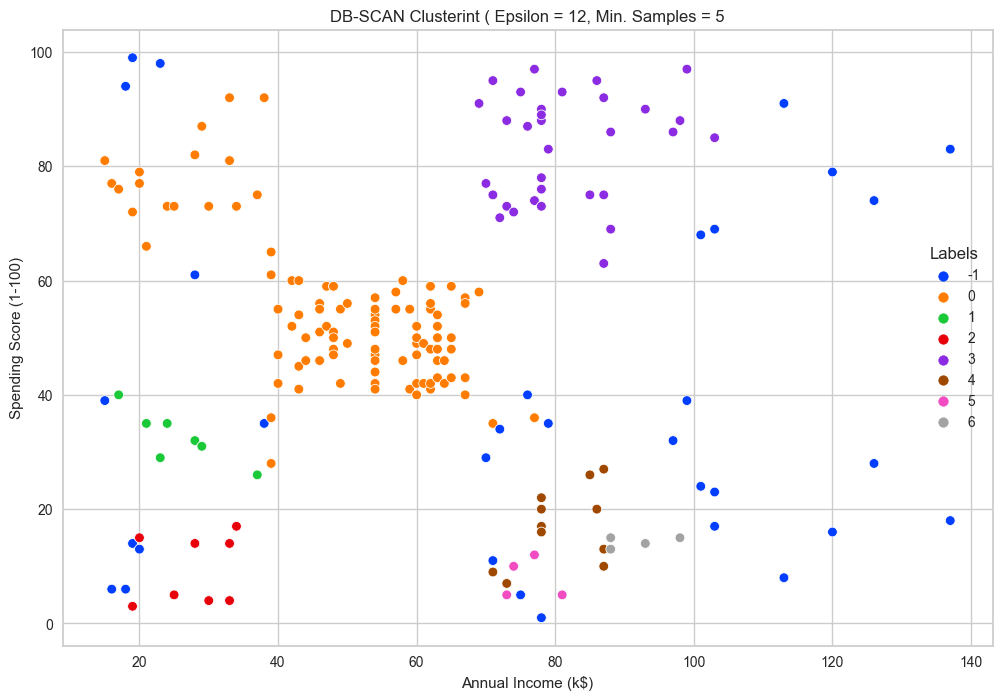

In [336]:
#DBSCAN

x = df.drop('Gender', axis=1)

db_clusters = DBSCAN(eps=12, min_samples=5).fit(x)

df['Labels'] = db_clusters.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('bright', np.unique(db_clusters.labels_).shape[0]))
plt.title('DB-SCAN Clusterint ( Epsilon = 12, Min. Samples = 5')
plt.show()